In [91]:
import pandas as pd
from pathlib import Path
from readpaf import parse_paf
from Bio import SeqIO
from Bio.Seq import Seq
import Levenshtein as lev

def edit_dist(read, mapping, ref):
    segm = ref.loc[ ref['ID'] == mapping['target_name'] ]['Sequence']
    T = segm.iloc[0][ mapping['target_start'] : mapping['target_end'] ]
    read_seq = read['Sequence']
    read_seq_rc = read_seq if mapping['strand'] == '+' else str(Seq(read_seq).reverse_complement())
    #ed = min(lev.distance(read_seq, T), lev.distance(str(Seq(read_seq).reverse_complement()), T))
    ed = lev.distance(read_seq_rc, T)
    ed = -1 if ed > 300 else ed
    #display(ed, read_seq, read_seq_rc, T, mapping)
    return ed

def fasta2df(fn):
    seqs = SeqIO.parse(fn, "fasta")
    df = pd.DataFrame((str(s.id), str(s.seq)) for s in seqs)
    df.columns = ["ID", "Sequence"]
    return df

def read_paf(pref):
    paf_file = pref.with_suffix('.paf')
    if not paf_file.exists():
        raise Exception(f"File does not exist or is empty: {paf_file}")
    with open(paf_file) as handle:
        return parse_paf(handle, dataframe=True)
    assert "Openning failed."

def get_ed(refname, experiment, tool):
    ref = fasta2df(Path('refs') / (refname+'.fa'))
    reads = fasta2df(Path('reads') / Path(experiment+'.fa'))
    d = Path("out") / experiment / tool / tool
    df = read_paf(d)
    df = df.head(100)
    df['ed'] = [edit_dist(reads.iloc[i], mapping, ref) for i, mapping in df.iterrows()]
    #display(ref, reads, df)
    return df

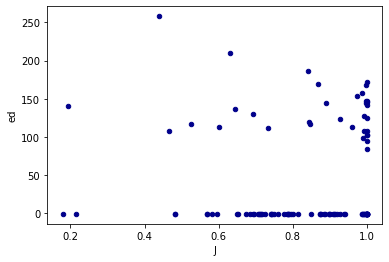

In [92]:
tool = 'sweepmap'
experiments = [
    ('chm13', 'chm13-a0.99-d0.1-l10000'),
    ('t2tChrY', 't2tChrY-a0.99-d10-l10000'),
    ('t2tChrY', 't2tChrY-a0.99-d1-l24000'),
    ('chm13', 'HG002_24kb'),
]

for refname, data in experiments:
    df = get_ed(refname, data, tool)
    # plot 2D dotpoint of ed vs. J 
    df.plot.scatter(x='J', y='ed', c='DarkBlue')
    break

In [1]:
import jscatter
import numpy as np

x = np.random.rand(500)
y = np.random.rand(500)

jscatter.plot(x, y)

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import ipywidgets
import jscatter
import numpy as np
import pandas as pd

df_sample = pd.DataFrame({
  # Random floats
  "mass": np.random.rand(500),
  "speed": np.random.rand(500),
  "pval": np.random.rand(500),
  # Random letters A, B, C, D, E, F, G, H
  "cat": np.vectorize(lambda x: chr(65 + round(x * 8)))(np.random.rand(500)),
})

scatter = jscatter.Scatter(data=df_sample, x="mass", y="speed", color_by="cat")

output = ipywidgets.Output()

@output.capture(clear_output=True)
def selection_change_handler(change):
    display(df_sample.loc[change.new].style.hide(axis='index'))
            
scatter.widget.observe(selection_change_handler, names=["selection"])

ipywidgets.HBox([scatter.show(), output])

In [5]:
import pygwalker as pyg

pyg.walk(df_sample)

Box(children=(HTML(value='\n<div id="ifr-pyg-00062685cf3d79208Kc364JEmksN27qO" style="height: auto">\n    <hea…

ERROR: kanaries_api_key is not valid.
Please set kanaries_api_key first.
If you are not kanaries user, please register it from 'https://kanaries.net/home/access' 
Then refer 'https://github.com/Kanaries/pygwalker/wiki/How-to-get-api-key-of-kanaries%3F' to set kanaries_api_key. 

ERROR: kanaries_api_key is not valid.
Please set kanaries_api_key first.
If you are not kanaries user, please register it from 'https://kanaries.net/home/access' 
Then refer 'https://github.com/Kanaries/pygwalker/wiki/How-to-get-api-key-of-kanaries%3F' to set kanaries_api_key. 

